In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


✅ Loaded 169845 samples, 7 emotion classes.

📘 Training samples: 135876 | 📗 Testing samples: 33969

🔠 Converting text to TF-IDF features...
✅ TF-IDF shape: (135876, 30000)

🚀 Training Logistic Regression...

📊 Results for Logistic Regression:
Accuracy : 0.7410
Precision: 0.7504
Recall   : 0.7410
F1 Score : 0.7435

Classification Report:

              precision    recall  f1-score   support

       anger     0.6837    0.7145    0.6988      4000
        fear     0.9043    0.8220    0.8612      4988
         joy     0.6634    0.7353    0.6975      4980
        love     0.6355    0.7327    0.6806      5826
     neutral     0.8555    0.7144    0.7786      5004
     sadness     0.7718    0.7459    0.7586      4171
    surprise     0.7481    0.7192    0.7334      5000

    accuracy                         0.7410     33969
   macro avg     0.7517    0.7406    0.7441     33969
weighted avg     0.7504    0.7410    0.7435     33969



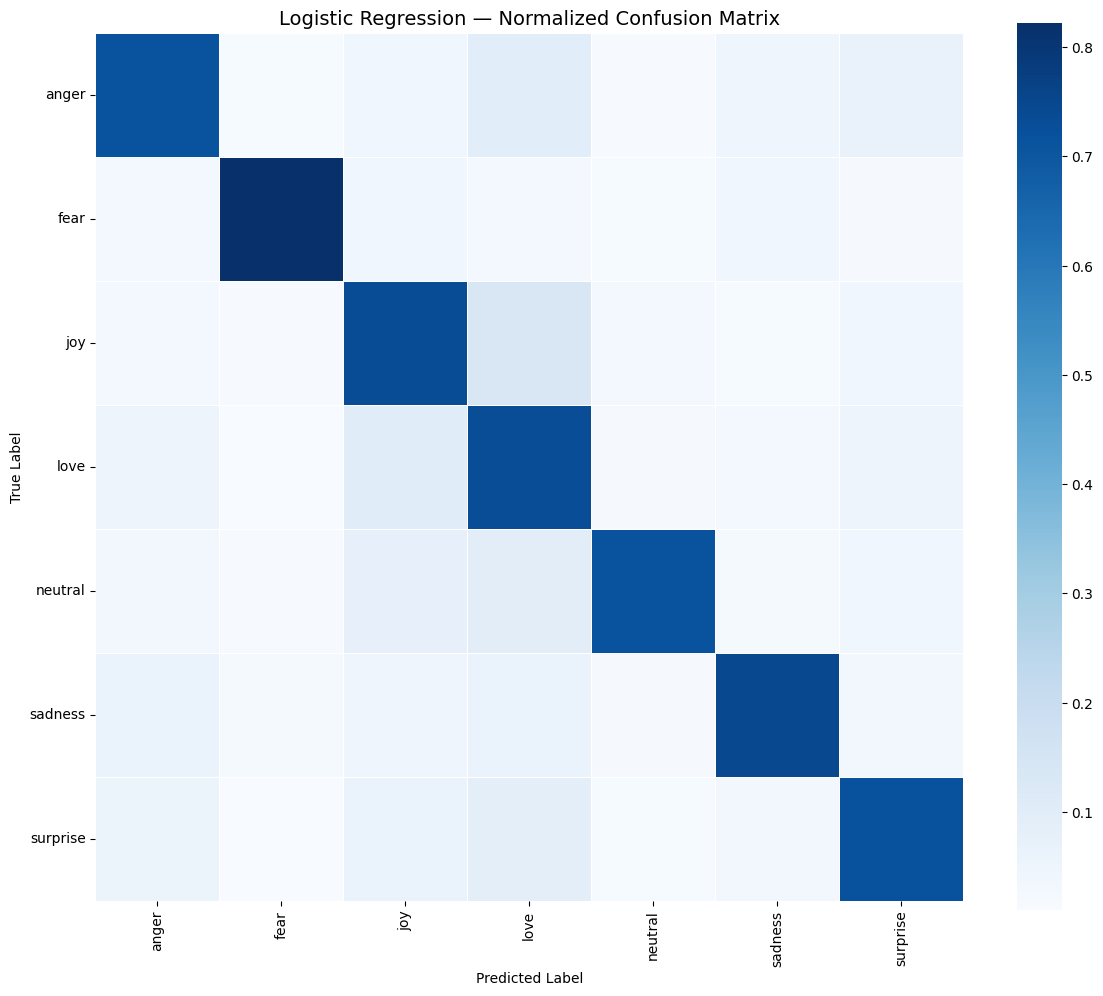


🚀 Training Naive Bayes...

📊 Results for Naive Bayes:
Accuracy : 0.6997
Precision: 0.7410
Recall   : 0.6997
F1 Score : 0.7075

Classification Report:

              precision    recall  f1-score   support

       anger     0.6681    0.6438    0.6557      4000
        fear     0.9436    0.7919    0.8611      4988
         joy     0.5745    0.7203    0.6392      4980
        love     0.5167    0.7817    0.6222      5826
     neutral     0.9169    0.6331    0.7490      5004
     sadness     0.8165    0.6783    0.7410      4171
    surprise     0.7854    0.6208    0.6935      5000

    accuracy                         0.6997     33969
   macro avg     0.7460    0.6957    0.7088     33969
weighted avg     0.7410    0.6997    0.7075     33969



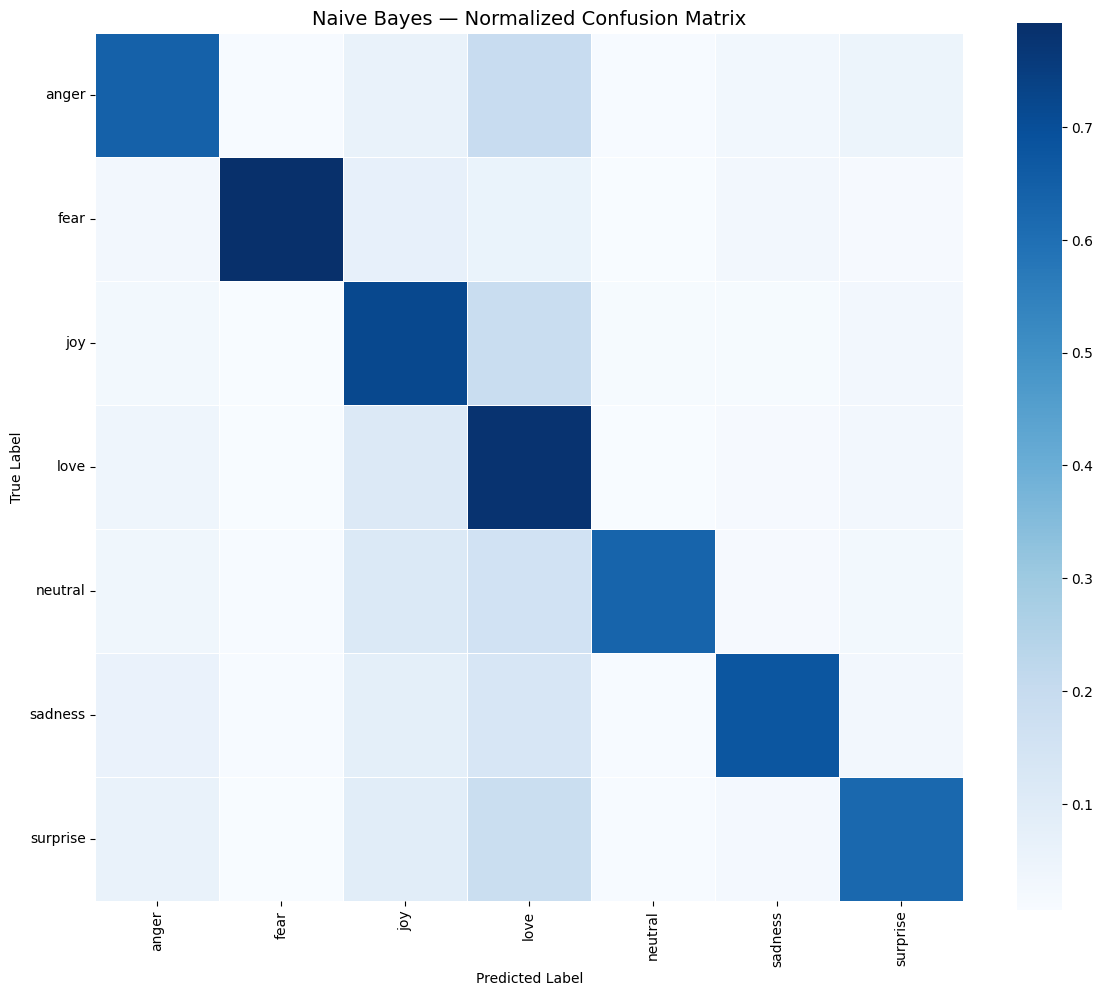


🚀 Training SVM...

📊 Results for SVM:
Accuracy : 0.7558
Precision: 0.7609
Recall   : 0.7558
F1 Score : 0.7575

Classification Report:

              precision    recall  f1-score   support

       anger     0.7094    0.7372    0.7231      4000
        fear     0.8905    0.8344    0.8615      4988
         joy     0.6893    0.7371    0.7124      4980
        love     0.6621    0.7161    0.6881      5826
     neutral     0.8476    0.7534    0.7977      5004
     sadness     0.7858    0.7598    0.7725      4171
    surprise     0.7519    0.7564    0.7541      5000

    accuracy                         0.7558     33969
   macro avg     0.7624    0.7564    0.7585     33969
weighted avg     0.7609    0.7558    0.7575     33969



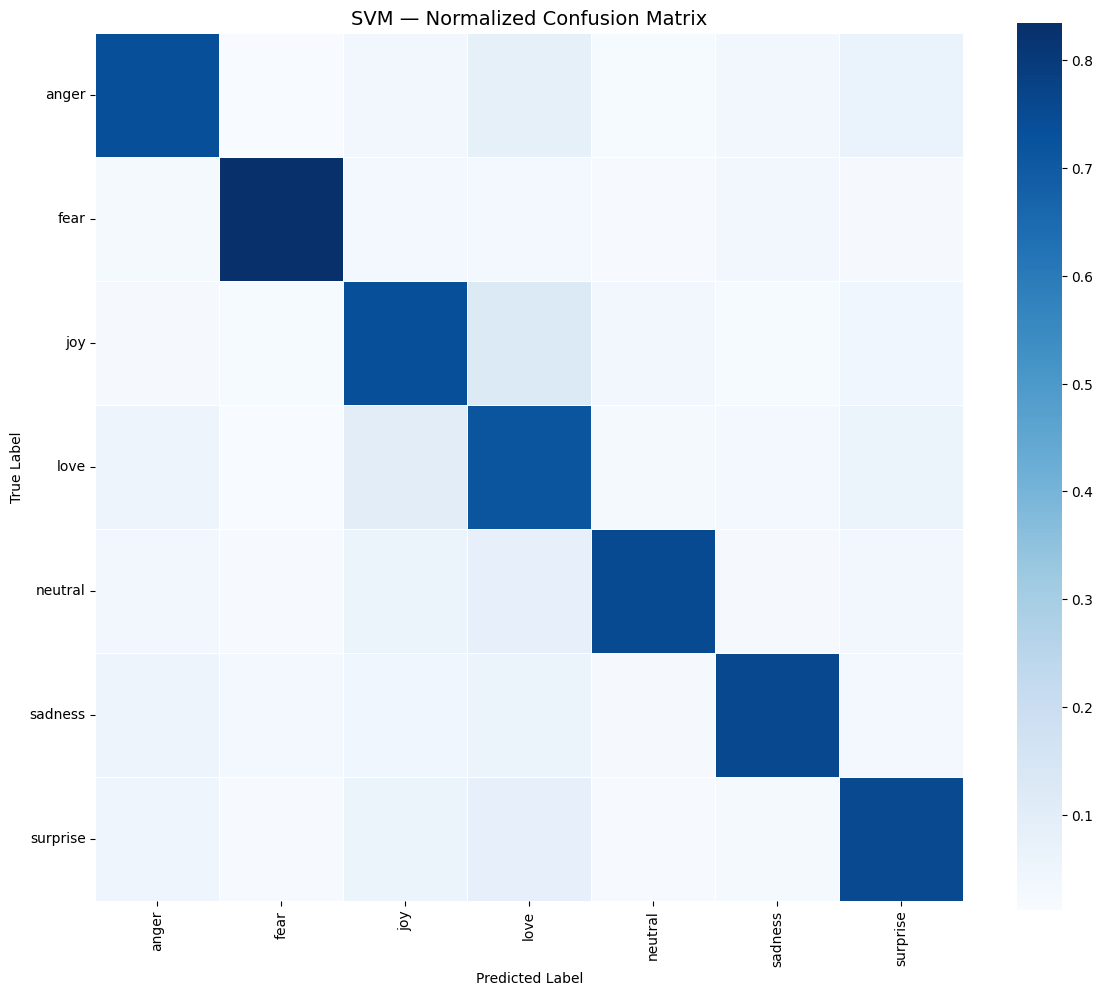


🏆 Model Performance Comparison:

                     Accuracy  Precision    Recall        F1
SVM                  0.755836   0.760910  0.755836  0.757473
Logistic Regression  0.740999   0.750437  0.740999  0.743523
Naive Bayes          0.699667   0.741016  0.699667  0.707471


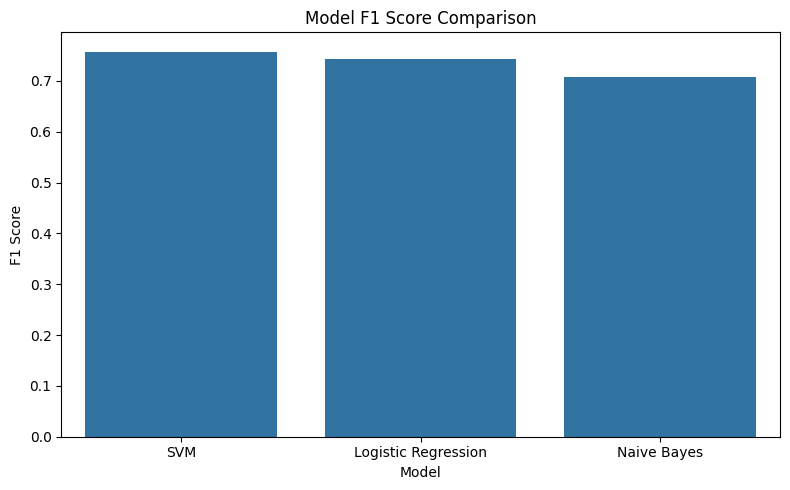


💾 Best model (SVM) and all artifacts saved to:
📁 /content/drive/MyDrive/sentiment_analysis
✅ Classical ML model training complete and safely stored in Drive!


In [9]:
# ================================================================
# 🧠 MindScape Emotion Classification — Logistic, Naive Bayes & SVM
# ================================================================

import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# ================================================================
# STEP 0 — Mount Google Drive
# ================================================================



SAVE_DIR = "/content/drive/MyDrive/sentiment_analysis"
os.makedirs(SAVE_DIR, exist_ok=True)

# ================================================================
# STEP 1 — Load Dataset
# ================================================================

df = pd.read_csv("/content/balanced_emotion_dataset.csv")
df = df[['text', 'emotion']].dropna()

print(f"✅ Loaded {len(df)} samples, {df['emotion'].nunique()} emotion classes.\n")

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['emotion'])
num_labels = len(le.classes_)

# Stratified Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
print(f"📘 Training samples: {len(train_df)} | 📗 Testing samples: {len(test_df)}")

# ================================================================
# STEP 2 — TF-IDF Vectorization
# ================================================================

print("\n🔠 Converting text to TF-IDF features...")
tfidf = TfidfVectorizer(
    max_features=30000,
    ngram_range=(1, 2),
    sublinear_tf=True,
    stop_words='english'
)
X_train = tfidf.fit_transform(train_df['text'])
X_test = tfidf.transform(test_df['text'])
y_train = train_df['label']
y_test = test_df['label']
print(f"✅ TF-IDF shape: {X_train.shape}")

# ================================================================
# STEP 3 — Define Models
# ================================================================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

results = {}

# ================================================================
# STEP 4 — Train & Evaluate Each Model
# ================================================================

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted', zero_division=0)

    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }

    print(f"\n📊 Results for {name}:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}\n")

    print("Classification Report:\n")
    print(classification_report(y_test, preds, target_names=le.classes_, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds, labels=range(num_labels))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm_norm,
        cmap="Blues",
        xticklabels=le.classes_,
        yticklabels=le.classes_,
        linewidths=0.5,
        square=True,
        annot=False
    )
    plt.title(f"{name} — Normalized Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ================================================================
# STEP 5 — Compare Model Performances
# ================================================================

results_df = pd.DataFrame(results).T.sort_values(by="F1", ascending=False)
print("\n🏆 Model Performance Comparison:\n")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["F1"])
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# ================================================================
# STEP 6 — Save Best Model, TF-IDF, and Label Encoder
# ================================================================

best_model_name = results_df.index[0]
best_model = models[best_model_name]

with open(f"{SAVE_DIR}/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)
with open(f"{SAVE_DIR}/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
with open(f"{SAVE_DIR}/{best_model_name.replace(' ', '_')}_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\n💾 Best model ({best_model_name}) and all artifacts saved to:")
print(f"📁 {SAVE_DIR}")
print("✅ Classical ML model training complete and safely stored in Drive!")



📊 Generating Confusion Matrix for Logistic Regression...


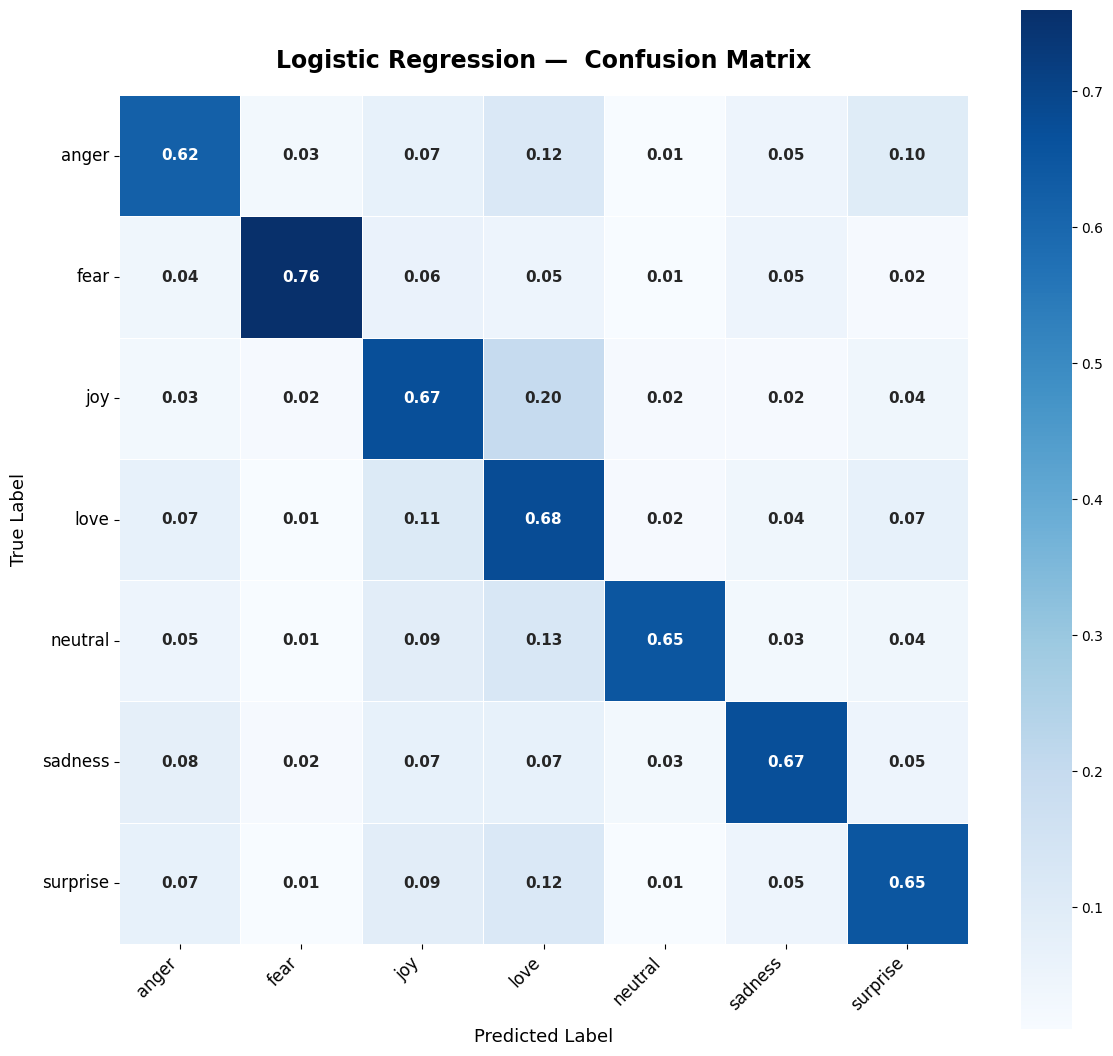


📊 Generating Confusion Matrix for Naive Bayes...


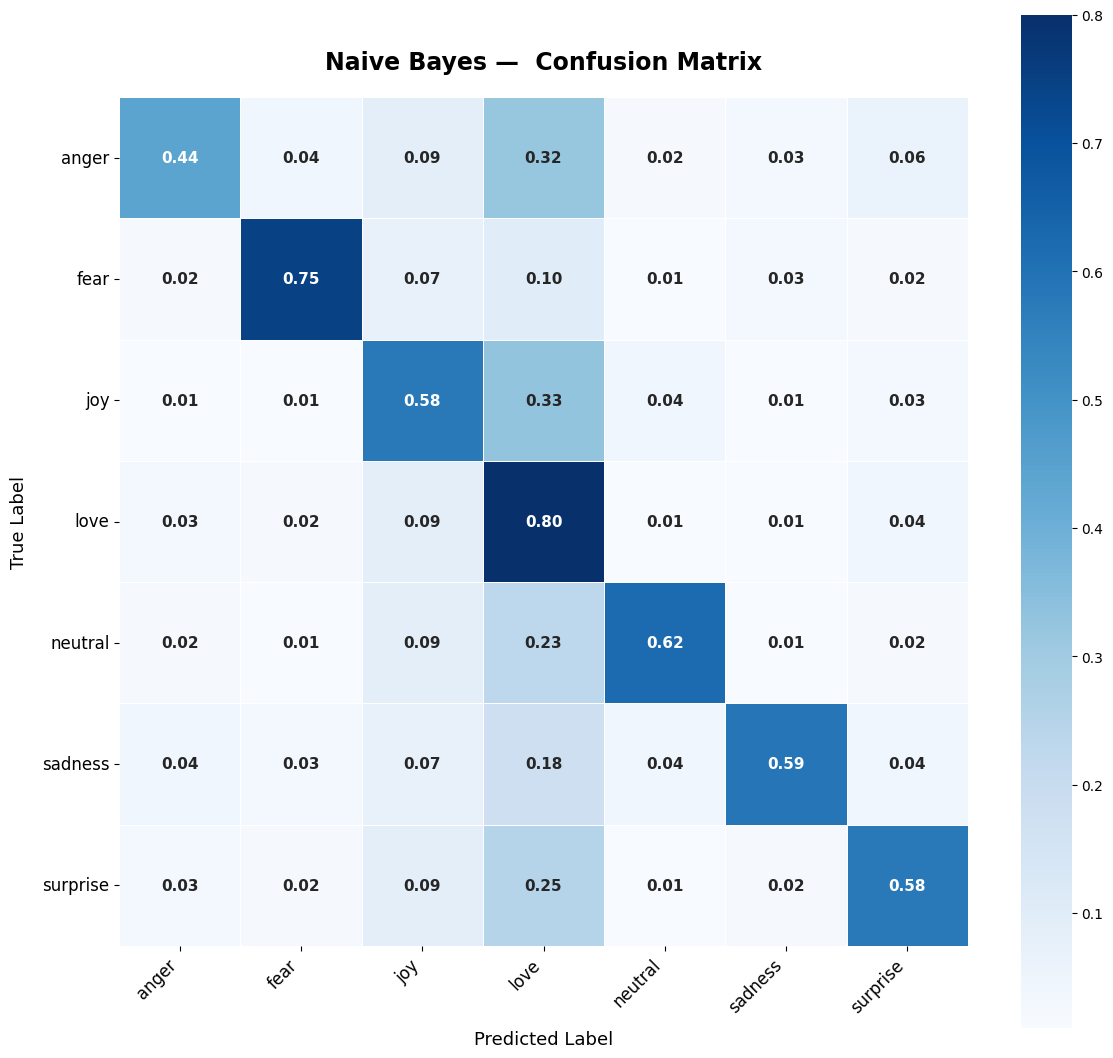


📊 Generating Confusion Matrix for SVM...


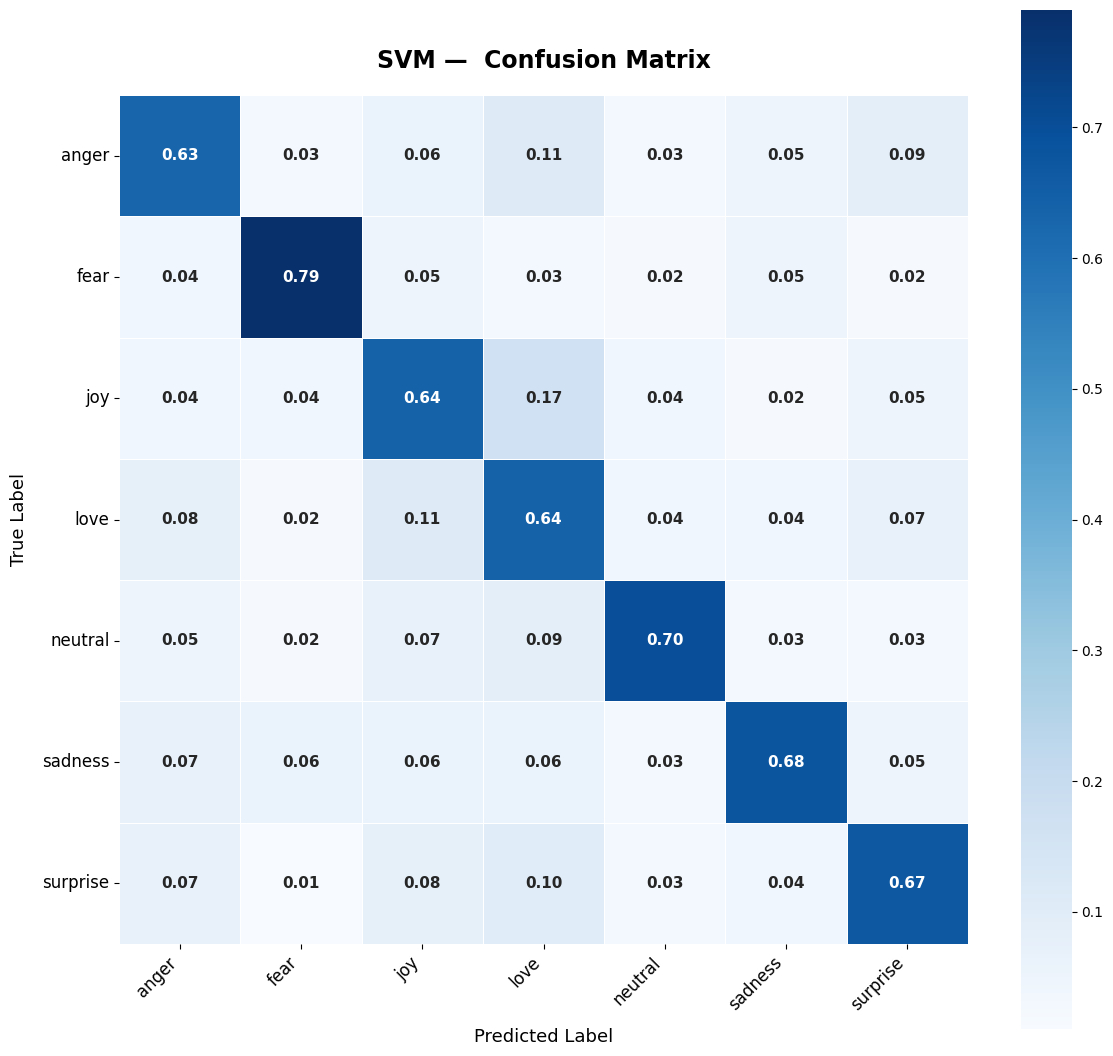

In [3]:
# ================================================================
# 🧠 MindScape — Final Confusion Matrix (Elegant Blue UI Style)
# ================================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix_final(y_true, y_pred, labels, model_name):
    # Compute normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    cm_display = np.round(cm, 2)

    plt.figure(figsize=(12, 11))
    sns.heatmap(
        cm_display,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        cbar=True,
        xticklabels=labels,
        yticklabels=labels,
        linewidths=0.5,
        linecolor='white',
        square=True,
        annot_kws={"size": 11, "weight": "bold"}
    )

    plt.title(f"{model_name} —  Confusion Matrix", fontsize=17, fontweight='bold', pad=20)
    plt.xlabel("Predicted Label", fontsize=13, labelpad=10)
    plt.ylabel("True Label", fontsize=13, labelpad=10)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # Tight layout for perfect centering
    plt.tight_layout()
    plt.show()
for name, model in models.items():
    print(f"\n📊 Generating Confusion Matrix for {name}...")
    preds = model.predict(X_test)
    plot_confusion_matrix_final(y_test, preds, le.classes_, model_name=name)


In [4]:
# ================================================================
# 🧠 MindScape Emotion Classification — Prediction Utility
# ================================================================

import pickle
import os
import numpy as np

# ================================================================
# STEP 1 — Load Artifacts
# ================================================================

SAVE_DIR = "/content/drive/MyDrive/sentiment_analysis"

# Choose the model you want to use
MODEL_NAME = "SVM_model.pkl"   # can switch to "Logistic_Regression_model.pkl" or "Naive_Bayes_model.pkl"

with open(os.path.join(SAVE_DIR, MODEL_NAME), "rb") as f:
    model = pickle.load(f)

with open(os.path.join(SAVE_DIR, "tfidf_vectorizer.pkl"), "rb") as f:
    tfidf = pickle.load(f)

with open(os.path.join(SAVE_DIR, "label_encoder.pkl"), "rb") as f:
    le = pickle.load(f)

print(f"✅ Loaded model: {MODEL_NAME}")
print(f"Classes: {list(le.classes_)}\n")

# ================================================================
# STEP 2 — Define Prediction Function
# ================================================================

def predict_emotion(texts, show_probs=False):
    """
    Predict emotion(s) for given input text(s).
    texts: str or list of str
    show_probs: display class probabilities (for models supporting predict_proba)
    """
    if isinstance(texts, str):
        texts = [texts]

    # TF-IDF transform
    X = tfidf.transform(texts)
    preds = model.predict(X)
    emotions = le.inverse_transform(preds)

    print("🧾 Predictions:")
    for t, e in zip(texts, emotions):
        print(f"🗣️ Text: {t}\n💬 Predicted Emotion: {e}\n")

    # Optional — show probabilities
    if show_probs and hasattr(model, "predict_proba"):
        probs = model.predict_proba(X)
        top_k = np.argsort(probs, axis=1)[:, ::-1]
        for i, text in enumerate(texts):
            print(f"🔎 Probabilities for: {text}")
            for idx in top_k[i][:3]:  # show top 3
                print(f"   {le.classes_[idx]}: {probs[i][idx]:.4f}")
            print("")

# ================================================================
# STEP 3 — Try Some Example Predictions
# ================================================================

sample_texts = [
    "I can’t stop smiling, this made my day!",
    "I feel nervous about tomorrow’s results.",
    "I didn’t expect that to happen at all!",
    "I miss the old days, everything feels heavy lately.",
    "Nothing special today, just working quietly."
]

predict_emotion(sample_texts)


✅ Loaded model: SVM_model.pkl
Classes: ['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']

🧾 Predictions:
🗣️ Text: I can’t stop smiling, this made my day!
💬 Predicted Emotion: joy

🗣️ Text: I feel nervous about tomorrow’s results.
💬 Predicted Emotion: fear

🗣️ Text: I didn’t expect that to happen at all!
💬 Predicted Emotion: surprise

🗣️ Text: I miss the old days, everything feels heavy lately.
💬 Predicted Emotion: fear

🗣️ Text: Nothing special today, just working quietly.
💬 Predicted Emotion: fear

